In [2]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from dateutil.relativedelta import relativedelta
import math
import matplotlib.dates as mdates
import warnings

In [2]:
def load_data(stock_name, date_predict_start, data_range, slide_range, n_slide):
    train_data = {}
    test_data = {}
    date_predict_start = datetime.datetime.strptime(
        date_predict_start, '%Y-%m-%d')
    date_data_start_list = []
    date_predict_start_list = []
    date_predict_end_list = []
    test_data_start_list = []
    all_data = yf.Ticker(stock_name).history(period='max')

    check = date_predict_start in list(all_data.index)
    while (check == False):
        date_predict_start = date_predict_start + \
            relativedelta(days=+1)
        check = date_predict_start in list(all_data.index)

    predict_start = all_data.index.get_loc(date_predict_start)
    for i in range(n_slide):
        predict_end = predict_start + data_range
        date_predict_end = all_data.iloc[predict_end].name
        data_start = predict_start - data_range
        date_data_start = all_data.iloc[data_start].name
        train_data['data_' + str(i)] = all_data.iloc[data_start:predict_start]
        test_data['data_' + str(i)] = all_data.iloc[predict_start:predict_end]
        date_data_start_list.append(date_data_start)
        date_predict_start_list.append(date_predict_start)
        date_predict_end_list.append(date_predict_end)
        test_data_start_list.append(datetime.datetime.strftime(
            test_data['data_' + str(i)].index[0], '%Y-%m-%d'))
        data_start = data_start + slide_range
        predict_start = predict_start + slide_range
        train_data['data_' + str(i)] = train_data['data_' +
                                                  str(i)].reset_index(drop=False)
        test_data['data_' + str(i)] = test_data['data_' +
                                                str(i)].reset_index(drop=False)

    return train_data, test_data, all_data, test_data_start_list


In [3]:
def data_to_polynomial_function(data_stock, order_lower_limit, order_upper_limit):
    warnings.simplefilter('ignore', np.RankWarning)
    processed_signal = {}
    for i in data_stock:
        processed_signal[i] = {}
        data = data_stock[i]['Close']
        y = np.array(data)
        x = np.arange(0, y.size)
        for order in range(order_lower_limit, order_upper_limit+1):
            coefficient  = np.polyfit(x, y, order)
            polynomial = np.polyval(coefficient, x)
            processed_signal[i][order] = pd.DataFrame(
                {'Close': np.tile(polynomial, 2)})
    return processed_signal
    

In [21]:
stock_name = "^GSPC"
date_predict_start = '2019-06-01'
data_range = 100
slide_range = 10
n_slide = 1
pv_range = 2
order_lower_limit = 3
order_upper_limit = 3
fit_method = 'maen'
pv_method = 'CL'
train_data, test_data, all_data, test_data_start_list = load_data(stock_name, date_predict_start, data_range, slide_range, n_slide)
processed_signal = data_to_polynomial_function(train_data, order_lower_limit, order_upper_limit)

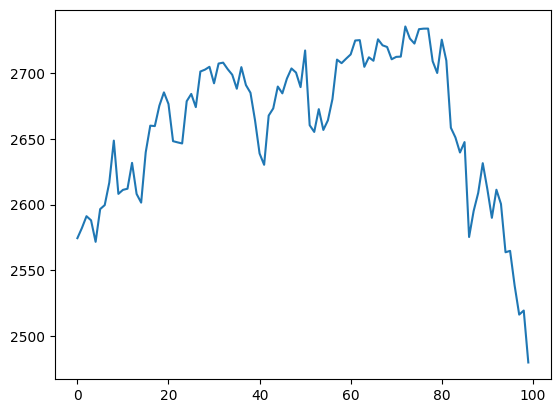

In [74]:
data = train_data['data_0']['Close']
array_data = np.array(data)
n_data = array_data.size
time_data = np.arange(0, n_data)

# detrend data
# find linear trend in data
Polynomial = np.polyfit(time_data, array_data, 1)
data_notrend = array_data - Polynomial[0] * time_data    # detrended x
plt.plot(data_notrend)

y = 2.750723315495593*x**1 + 2661.0896890470285*x**0


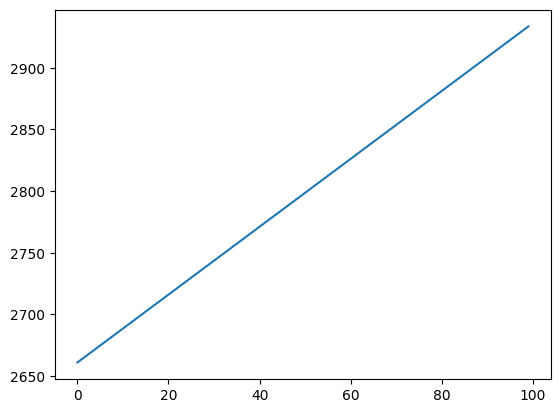

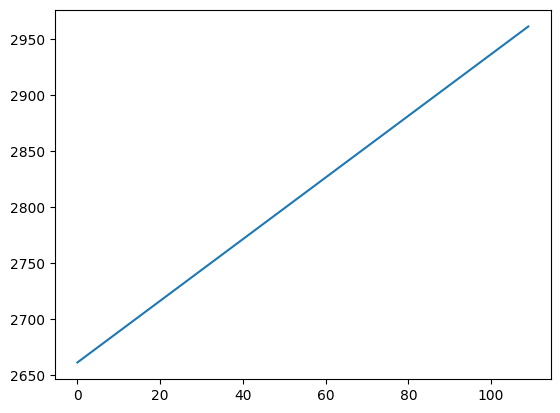

In [161]:
data = train_data['data_0']['Close']
# data = data_notrend
y = np.array(data)
x = np.arange(0, y.size)
order_lower_limit = 1
order_upper_limit = 1
for order in range(order_lower_limit, order_upper_limit+1):
    coefficient  = np.polyfit(x, y, order)
    equation = 'y = '
    order_ = order
    for coef in coefficient :
        equation += f'{coef}*x**{order_}'
        if order_> 0:
            equation += ' + '
        order_ += -1
    print(equation)
    # print(coefficient)
    xx = np.arange(0, y.size+10)
    polynomial = np.polyval(coefficient, x)
    plt.plot(polynomial)
    plt.show()
    polynomial = np.polyval(coefficient, xx)
    plt.plot(polynomial)
    plt.show()
    # processed_signal['data_0'][order] = pd.DataFrame(
    #     {'Close': polynomial})

y = -4.1677895338127717e-22*x**10 + 1.5422487403990498e-18*x**9 + -2.407203831051286e-15*x**8 + 2.055492447809873e-12*x**7 + -1.0403002147942411e-09*x**6 + 3.153568829992761e-07*x**5 + -5.493620904016194e-05*x**4 + 0.004952821199152663*x**3 + -0.18657880817549274*x**2 + 3.0403232541612915*x**1 + 2889.0760206486434*x**0


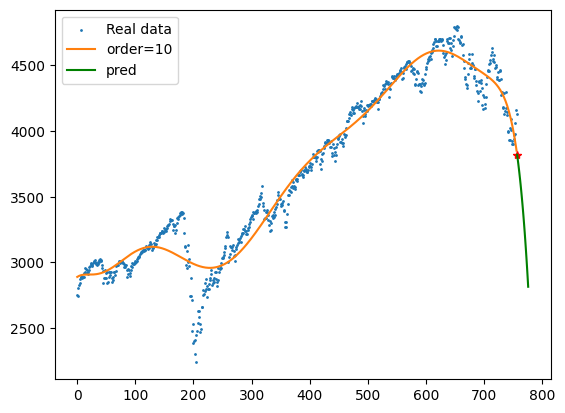

In [19]:
order = 10
coefficient = np.polyfit(x, y, order)
order_ = order
equation = 'y = '
for coef in coefficient :
    coef_ = coef
    equation += f'{coef_}*x**{order_}'
    if order_> 0:
        equation += ' + '
    order_ += -1
print(equation)
# polynomial = np.polyval(coefficient,x)
xx = np.arange(0, y.size+20)
polynomial = np.polyval(coefficient, xx)
plt.scatter(x, y, label='Real data', s=1)
plt.plot(xx[:y.size], polynomial[:y.size],
                label="order={}".format(order), color='C1')
plt.plot(xx[y.size:y.size+1],
                polynomial[y.size:y.size+1], '*', color='red')
plt.plot(xx[y.size:], polynomial[y.size:],
                label="pred", color='green')
plt.legend()
plt.show()

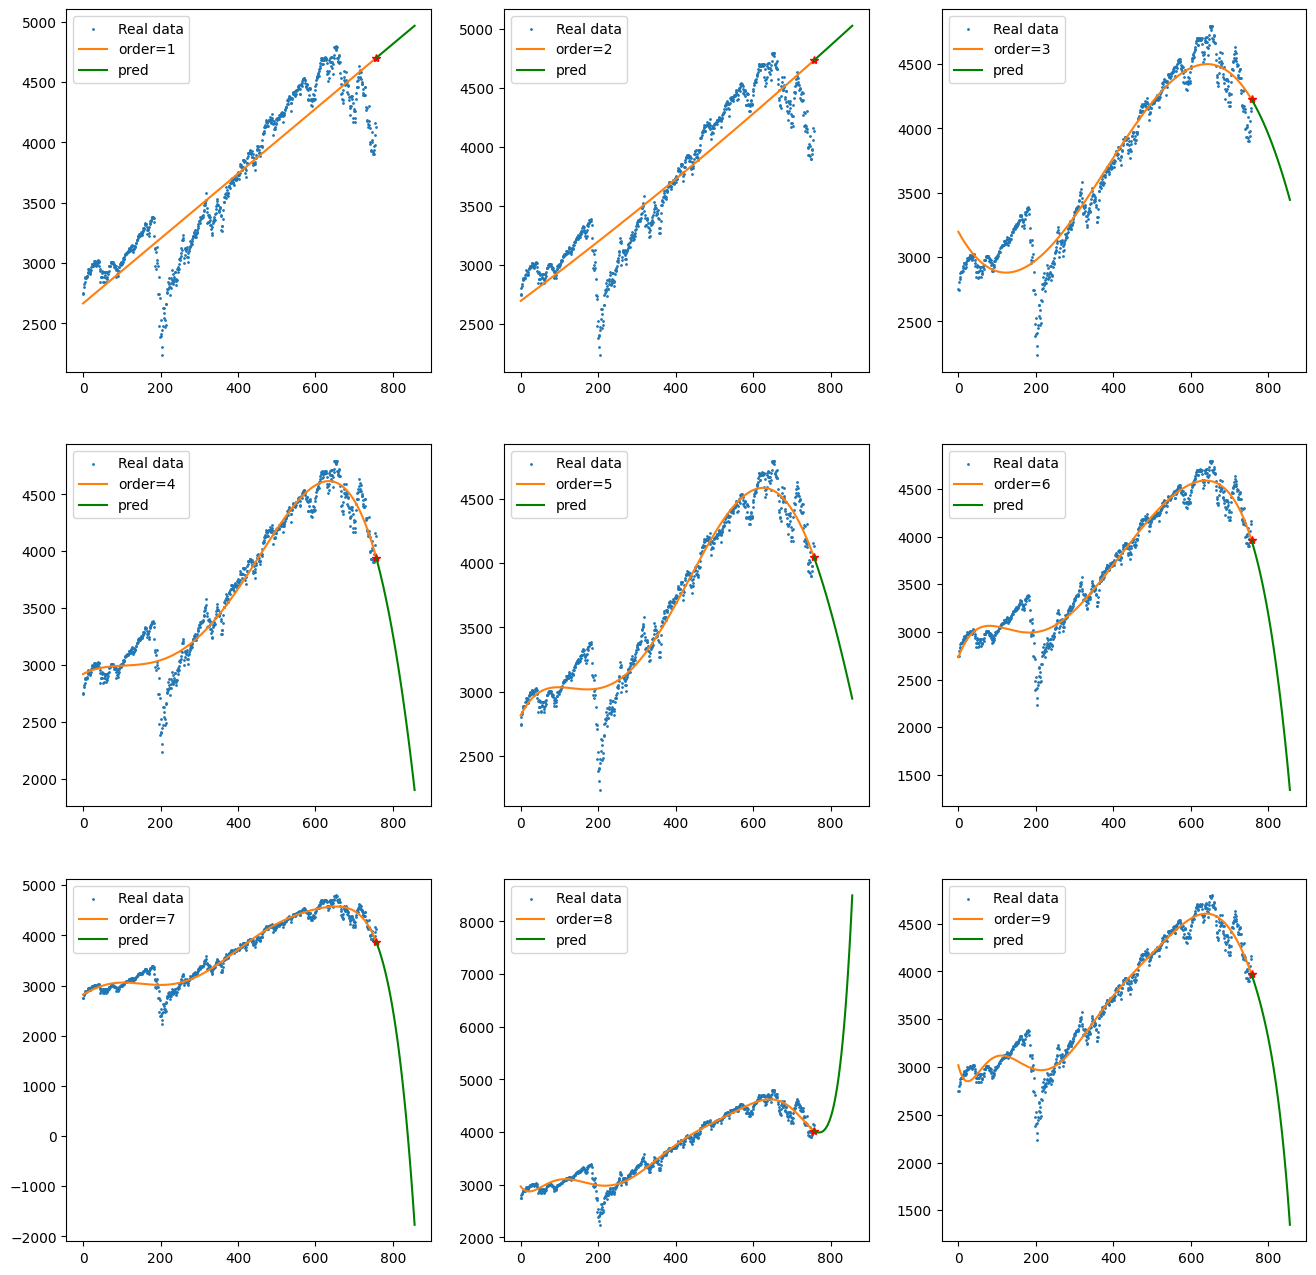

In [163]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)
stock_name = "^GSPC"
data_stock = yf.Ticker(stock_name).history(
    start='2019-06-01', end='2022-06-01')
data = data_stock['Close']
y = np.array(data)
x = np.arange(0, y.size)
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
for n in range(3):
    for k in range(3):
        order = n*3+k+1
        coefficient = np.polyfit(x, y, order)
        # polynomial = np.polyval(coefficient,x)
        xx = np.arange(0, y.size+100)
        polynomial = np.polyval(coefficient, xx)
        axes[n, k].scatter(x, y, label='Real data', s=1)
        axes[n, k].plot(xx[:y.size], polynomial[:y.size],
                        label="order={}".format(order), color='C1')
        axes[n, k].plot(xx[y.size:y.size+1],
                        polynomial[y.size:y.size+1], '*', color='red')
        axes[n, k].plot(xx[y.size:], polynomial[y.size:],
                        label="pred", color='green')
        axes[n, k].legend()

y = -4.1677895338127717e-22*x**10 + 1.5422487403990498e-18*x**9 + -2.407203831051286e-15*x**8 + 2.055492447809873e-12*x**7 + -1.0403002147942411e-09*x**6 + 3.153568829992761e-07*x**5 + -5.493620904016194e-05*x**4 + 0.004952821199152663*x**3 + -0.18657880817549274*x**2 + 3.0403232541612915*x**1 + 2889.0760206486434*x**0
y = 2.8325911319367307e-24*x**11 + -1.2194692880705151e-20*x**10 + 2.2739756314172665e-17*x**9 + -2.4034860987484357e-14*x**8 + 1.5816931435697783e-11*x**7 + -6.699542042756844e-09*x**6 + 1.8232841213538818e-06*x**5 + -0.0003088392126503469*x**4 + 0.030453401188111334*x**3 + -1.5546702169045208*x**2 + 34.42855519837001*x**1 + 2716.997884631884*x**0
y = -1.4078093687350463e-26*x**12 + 6.669082411242119e-23*x**11 + -1.3916889750676528e-19*x**10 + 1.6814385851382954e-16*x**9 + -1.2998449871851645e-13*x**8 + 6.704115989823266e-11*x**7 + -2.3325605136505732e-08*x**6 + 5.408240903360997e-06*x**5 + -0.0008056948607948834*x**4 + 0.07200616734923738*x**3 + -3.4248720215491937*x**

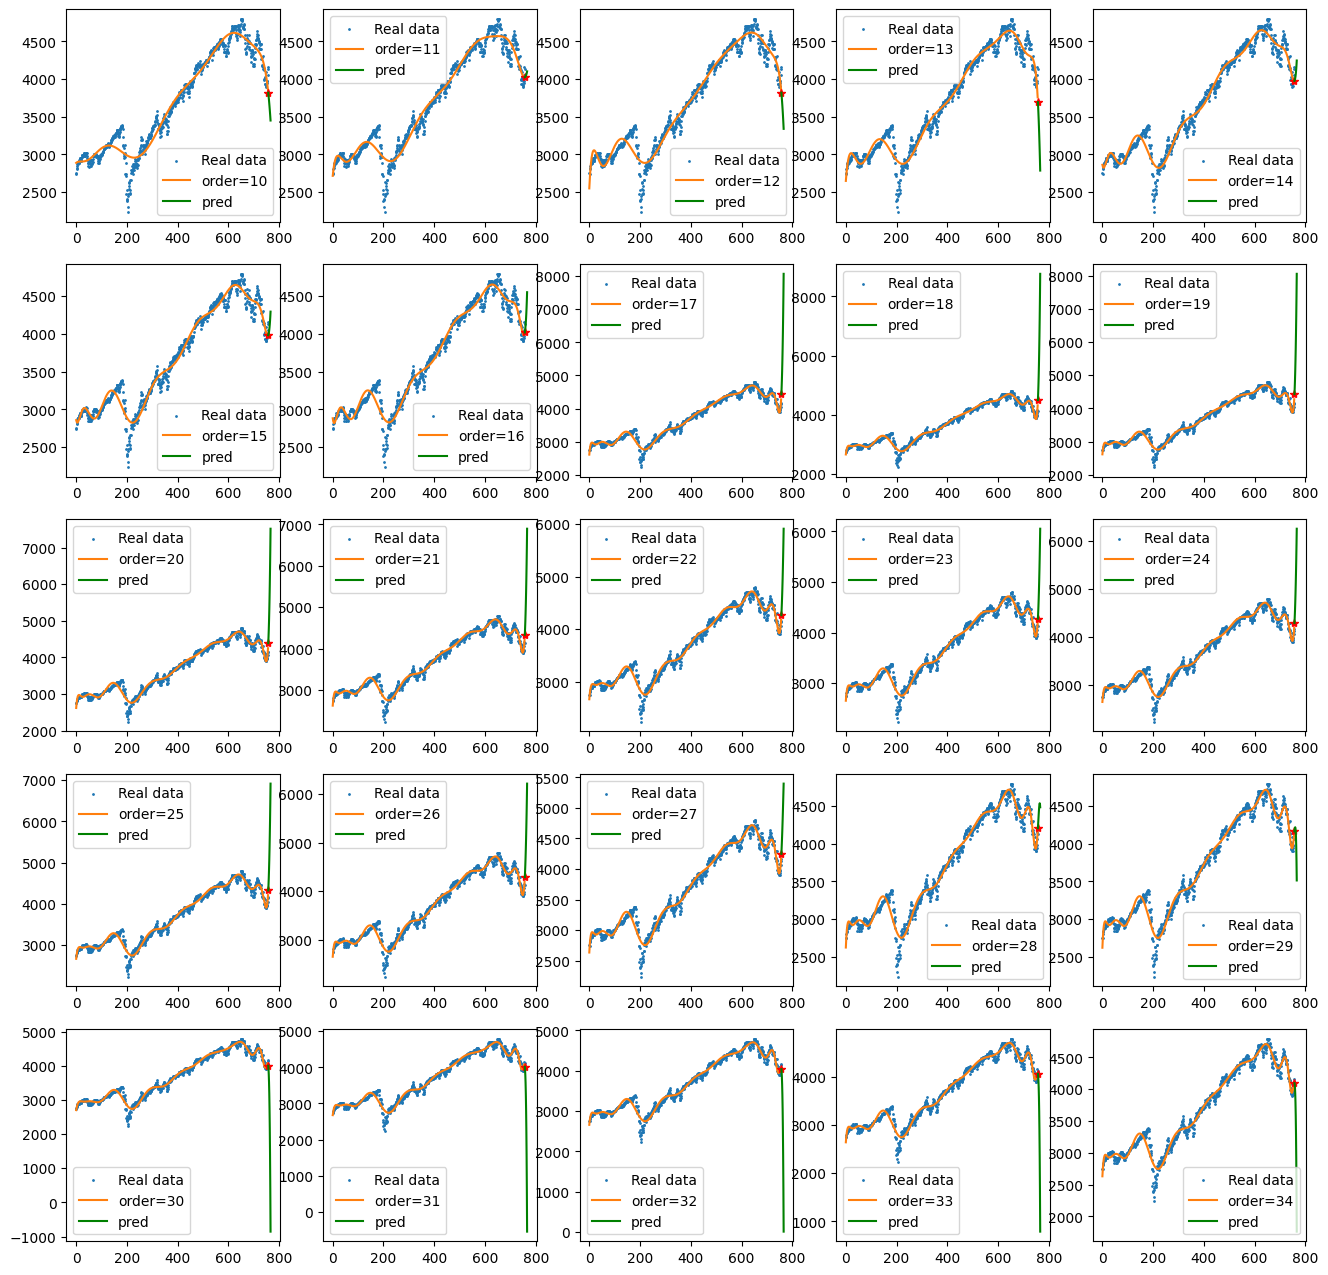

In [11]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)
stock_name = "^GSPC"
data_stock = yf.Ticker(stock_name).history(
    start='2019-06-01', end='2022-06-01')
data = data_stock['Close']
y = np.array(data)
x = np.arange(0, y.size)
fig, axes = plt.subplots(5, 5, figsize=(16, 16))
for n in range(5):
    for k in range(5):
        order = n*5+k+10
        coefficient = np.polyfit(x, y, order)
        order_ = order
        equation = 'y = '
        for coef in coefficient :
            coef_ = coef
            equation += f'{coef_}*x**{order_}'
            if order_> 0:
                equation += ' + '
            order_ += -1
        print(equation)
        # polynomial = np.polyval(coefficient,x)
        xx = np.arange(0, y.size+10)
        polynomial = np.polyval(coefficient, xx)
        axes[n, k].scatter(x, y, label='Real data', s=1)
        axes[n, k].plot(xx[:y.size], polynomial[:y.size],
                        label="order={}".format(order), color='C1')
        axes[n, k].plot(xx[y.size:y.size+1],
                        polynomial[y.size:y.size+1], '*', color='red')
        axes[n, k].plot(xx[y.size:], polynomial[y.size:],
                        label="pred", color='green')
        axes[n, k].legend()
